<a href="https://colab.research.google.com/gist/LungeloDev/dcb60e8feadccb4233780b91848e018c/team_unizulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Read Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import skew

In [48]:
#Reading Our datasets
train = pd.read_csv('drive/MyDrive/Colab Notebooks/Train.csv')
test = pd.read_csv('drive/MyDrive/Colab Notebooks/Test.csv')
vdefinition = pd.read_csv('drive/MyDrive/Colab Notebooks/variable_descriptions.csv')
model = pd.read_csv('drive/MyDrive/Colab Notebooks/model.csv')

**Variables Used in this Project**

---



In [3]:
#Since some variables in our dataset are abbriviated. Here is our variable definitions before you go through our insights.
vdefinition

,Column,Description
0,total_households,Totoal number of households in ward
1,total_individuals,Total number of individuals in ward
2,target_pct_vunerable,Percentage of large households who have to lea...
3,dw_00,Percentage of dwellings of type: House or bric...
4,dw_01,Percentage of dwellings of type: Traditional d...
5,dw_02,Percentage of dwellings of type: Flat or apart...
6,dw_03,Percentage of dwellings of type: Cluster house...
7,dw_04,Percentage of dwellings of type: Townhouse (se...
8,dw_05,Percentage of dwellings of type: Semi-detached...
9,dw_06,Percentage of dwellings of type: House/flat/ro...


**Our First Datasets (Training and Testing)**

In [4]:
#Displaying our Train Data
df = pd.DataFrame(data=train)
df
# target_pct_vunerable variable is a label, since we are using a supervised learning we need to train our dataset using a labeled dataset.

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,0.044411,0.360511,0.004950,0.000848,0.006711,0,0,0.192690,0.626544,0.000396,0.071214,0.109157,0.275335,0.724665,0.343501,0.656499,0.326122,0.673878,0.012956,0.482007,0.009574,0.109440,0.299974,0.001880,0.015047,0.004691,0.003556,0.003843,0.000787,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,0.231013,0.289105,0.025454,0.000289,0.007050,0,0,0.165663,0.701452,0.000713,0.016803,0.115370,0.059933,0.940067,0.080532,0.919468,0.033706,0.966294,0.003241,0.013292,0.010543,0.233694,0.486355,0.029286,0.111983,0.011787,0.004042,0.010961,0.005768,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,0.132829,0.001320,0.002305,0.000849,0.006466,0,0,0.293674,0.534299,0.000397,0.027582,0.144048,0.169733,0.830267,0.108760,0.891240,0.056128,0.943872,0.008827,0.019836,0.004155,0.220034,0.077659,0.002389,0.560416,0.018953,0.010277,0.004701,0.002755,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0,0,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0,0,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,HFWMU2J,703.70893,2757.17876,3.500868,0.816469,0.070643,0.003699,0.004518,0.000000,0.000000,0.001433,0.006391,0.049242,0.011097,0.012207,0.024301,0,0,0.215378,0.648514,0.000000,0.015256,0.120853,0.186006,0.813994,0.278325,0.721675,0.026363,0.973637,0.983206,0.005568,0.000422,0.000903,0.000481,0.001384,0.000903,0.001795,0.000903,0.000422,0.000873,0.000000,0.000962,0,0.002176,0.032270,0.924304,0.002366,0.035771,0.005288,0.691621
3170,8LVBHRG,8265.55628,29868.09873,0.116460,0.913623,0.000397,0.001184,0.000270,0.000124,0.000862,0.025582,0.015723,0.037453,0.001375,0.000000,0.003407,0,0,0.292636,0.533827,0.000707,0.080066,0.092764,0.452699,0.547301,0.380879,0.619121,0.166724,0.833276,0.002240,0.021769,0.024921,0.008089,0.036519,0.054329,0.028624,0.743253,0.002812,0.007738,0.005607,0.050325,0.012501,0,0.001272,0.995016,0.001392,0.000869,0.000366,0.002357,0.980561
3171,5WDYHUG,6338.67028,29458.48566,0.958828,0.758389,0.017707,0.037914,0.001091,0.001560,0.000168,0.010662,0.033981,0.132129,0.001966,0.000168,0.004266,0,0,0.235334,0.565402,0.000429,0.105054,0.093781,0.270922,0.729078,0.149104,0.850896,0.170906,0.829094,0.001822,0.016134,0.010802,0.011579,0.936921,0.001747,0.007378,0.004386,0.005457,0.000543,0.000249,0.000725,0.002257,0,0.000000

In [5]:
#Displaying Our Test Data
dt = pd.DataFrame(data=test)
dt
#this is a testing dataset, it is not labeled.

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,00A93O0,2514.04172,8037.06199,0.671962,0.061074,0.101516,0.006891,0.021287,0.015615,0.035974,0.010995,0.030665,0.000563,0.004513,0.038943,0,0,0.327785,0.400204,0.000142,0.090634,0.181234,0.082473,0.917527,0.170320,0.829680,0.028193,0.971807,0.006861,0.025960,0.001401,0.864523,0.010393,0.001966,0.004094,0.000991,0.007919,0.000136,0.000146,0.000420,0.011485,0,0.063705,0.979272,0.009926,0.003224,0.002697,0.004882,0.521007
1,01V40KO,1829.71944,7494.86917,0.542857,0.390850,0.039623,0.000000,0.000000,0.000000,0.002633,0.005074,0.010439,0.000000,0.000544,0.007980,0,0,0.396451,0.448673,0.002026,0.015543,0.137307,0.028539,0.971461,0.087096,0.912904,0.014139,0.985861,0.003348,0.008866,0.001654,0.968007,0.005108,0.002472,0.001524,0.001974,0.006575,0.000152,0.000160,0.000000,0.000160,0,0.000000,0.998938,0.000296,0.000301,0.000305,0.000160,0.693716
2,01ZHVW0,1721.99009,5847.43254,0.968071,0.003525,0.001431,0.000000,0.000000,0.000000,0.018546,0.004769,0.000825,0.000000,0.000000,0.002832,0,0,0.315332,0.550687,0.000000,0.009654,0.124326,0.108260,0.891740,0.115144,0.884856,0.047064,0.952936,0.037169,0.019334,0.001471,0.918999,0.003145,0.001087,0.001963,0.001543,0.005908,0.000000,0.002075,0.000631,0.006504,0,0.000171,0.955895,0.012170,0.000000,0.030012,0.001923,0.933954
3,028YQJX,12388.02257,52211.66859,0.397274,0.004734,0.001068,0.000279,0.000799,0.197760,0.005227,0.065487,0.316633,0.003892,0.000279,0.006569,0,0,0.242343,0.568208,0.001050,0.066225,0.122174,0.146214,0.853786,0.223657,0.776343,0.174330,0.825670,0.485175,0.240164,0.002869,0.242053,0.003676,0.000726,0.008142,0.003545,0.003591,0.000629,0.000505,0.000593,0.008330,0,0.000000,0.293629,0.694779,0.003238,0.000628,0.007726,0.921470
4,02G8W11,1754.25716,4266.57609,0.815197,0.016697,0.078571,0.008975,0.047882,0.015398,0.007264,0.000000,0.000712,0.007003,0.000877,0.001425,0,0,0.110625,0.663775,0.000000,0.024673,0.200927,0.723028,0.276972,0.930886,0.069114,0.808671,0.191329,0.457734,0.334764,0.000843,0.005681,0.001384,0.000000,0.002514,0.000829,0.000284,0.000290,0.000000,0.000234,0.016846,0,0.178598,0.110861,0.054114,0.006062,0.823495,0.005470,0.996227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,ZV3KA4K,1871.18898,6946.20305,0.226464,0.629322,0.039062,0.001706,0.001052,0.001353,0.008017,0.009431,0.036383,0.006669,0.002109,0.038431,0,0,0.334878,0.469562,0.000170,0.069992,0.125398,0.154493,0.845507,0.172786,0.827214,0.057982,0.942018,0.073606,0.036120,0.003405,0.778058,0.004333,0.003082,0.073644,0.001818,0.005974,0.000164,0.000000,0.000000,0.006982,0,0.012813,0.904646,0.034943,0.002611,0.055046,0.002753,0.256395
1098,ZV99Z7P,2164.66856,5974.39531,0.738136,0.003566,0.005022,0.000000,0.001936,0.000000,0.003351,0.232637,0.002122,0.007532,0.000575,0.005124,0,0,0.215441,0.631586,0.000000,0.038757,0.114216,0.201709,0.798291,0.120893,0.879107,0.021724,0.978276,0.024311,0.034020,0.007054,0.844889,0.010083,0.005908,0.013570,0.003205,0.006596,0.000867,0.000188,0.008148,0.041159,0,0.000000,0.965275,0.012481,0.000823,0.000627,0.020794,0.989622
1099,ZVO9F7A,3822.71308,13000.22241,0.927417,0.000890,0.012602,0.000859,0.000669,0.003711,0.029519,0.013913,0.005645,0.001181,0.000599,0.002995,0,0,0.328053,0.515934,0.000000,0.037311,0.118702,0.145487,0.854513,0.120380,0.879620,0.039948,0.960052,0.006107,0.065649,0.001820,0.897004,0.002412,0.000769,0.003713,0.001226,0.006926,0.000085,0.000694,0.000431,0.006319,0,0.006846,0.993986,0.001846,0.000673,0.000468,0.003028,0.938536
1100,ZVVA1LV,2075.42181,10280.57452,0.410837

**Data Cleaning, Analysis & Visualizing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households per Ward')

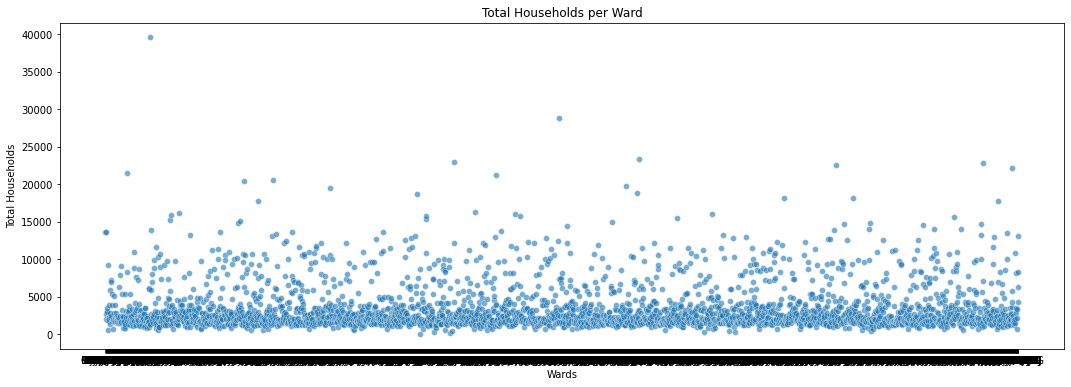

In [6]:
#Plotting a Scatter Plot for the Train data
plt.figure(figsize=(18,6))
sns.scatterplot('ward', 'total_households', data=train, alpha=0.6)
plt.xlabel("Wards")
plt.ylabel("Total Households")
plt.title("Total Households per Ward")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households per Ward')

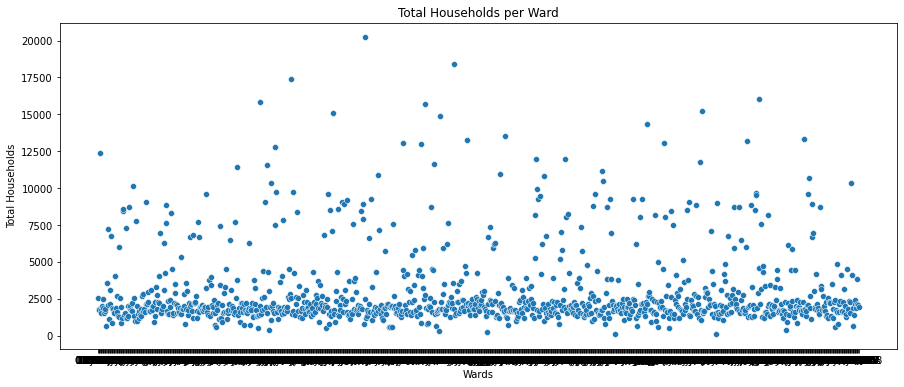

In [7]:
#Plotting a Scatter Plot for the Test data
plt.figure(figsize=(15,6))
sns.scatterplot(test['ward'], test['total_households'])
plt.xlabel("Wards")
plt.ylabel("Total Households")
plt.title("Total Households per Ward")

The Above Scatter Plots shows us that our data contains data points that can demage model's perfomance. 
By that we have to perfom data cleaning to boost model's perfomance.

In [8]:
#Dropping wards with greater or equal to 15000 of total households
train = train[train['total_households']<=15000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households vs Total Individuals')

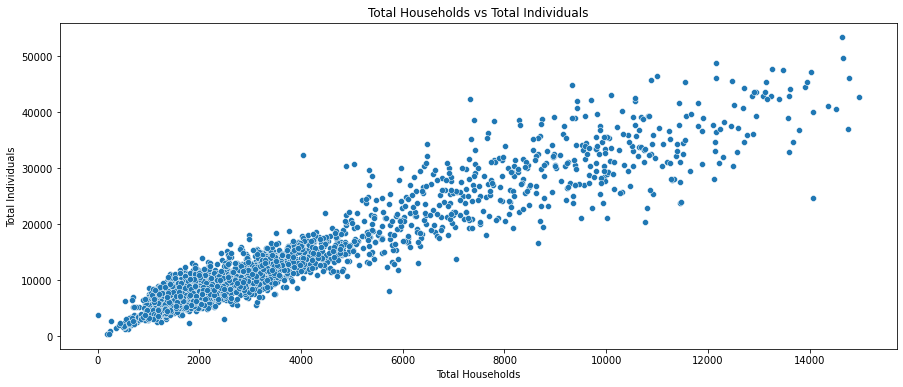

In [9]:
# comparing relationship between Total Households and Total Individuals
plt.figure(figsize=(15,6))
sns.scatterplot('total_households', 'total_individuals', data=train)
plt.xlabel("Total Households")
plt.ylabel("Total Individuals")
plt.title("Total Households vs Total Individuals")

since our data is big, the graph is not clear and it is seen from it that they may be an outlier in between 0<total_households<2000

In [10]:
#creating a short copy for the first few values.
tr_copy = df.copy()
tr_copy = tr_copy[tr_copy['total_households']<=2000]
tr_copy

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0,0,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0,0,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964
8,BSJYBO9,1846.67063,6752.59784,22.837016,0.918951,0.076072,0.001948,0.000552,0.000000,0.000000,0.000000,0.001901,0.000000,0.000000,0.000000,0.000575,0,0,0.422909,0.428407,0.000158,0.019946,0.128580,0.068526,0.931474,0.118271,0.881729,0.008290,0.991710,0.000320,0.005139,0.000945,0.000000,0.001295,0.012386,0.033995,0.000163,0.000805,0.000964,0.006898,0.932699,0.004392,0,0.000000,0.998386,0.000322,0.001129,0.000163,0.000000,0.937336
10,DKGAH8I,598.31812,1266.29666,0.896916,0.679012,0.037881,0.077707,0.112421,0.059123,0.013006,0.009879,0.003008,0.000000,0.001893,0.002089,0.003982,0,0,0.197408,0.692447,0.000000,0.047857,0.062289,0.550123,0.449877,0.581647,0.418353,0.461431,0.538569,0.062137,0.522482,0.016653,0.006038,0.357876,0.000000,0.007526,0.002986,0.005100,0.000000,0.000000,0.000000,0.019202,0,0.000000,0.506309,0.027069,0.050786,0.406238,0.009598,0.956912
11,Z8L9FJ3,1783.91978,7431.50564,7.273949,0.967844,0.012623,0.002514,0.000560,0.000000,0.000000,0.002690,0.003097,0.006183,0.000000,0.000000,0.004491,0,0,0.398141,0.450026,0.000150,0.020773,0.130911,0.159649,0.840351,0.154980,0.845020,0.015046,0.984954,0.002339,0.003403,0.003230,0.000729,0.008319,0.952446,0.001463,0.002745,0.001441,0.000000,0.000299,0.002333,0.013719,0,0.007535,0.995864,0.000412,0.000606,0.000551,0.002567,0.933042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,NNSTKY7,1184.97775,3523.05659,0.675118,0.950444,0.001290,0.007980,0.000000,0.000868,0.000000,0.003870,0.008200,0.019831,0.002580,0.002694,0.002242,0,0,0.164371,0.687583,0.000000,0.008475,0.139570,0.178506,0.821494,0.296846,0.703154,0.270897,0.729103,0.922979,0.002840,0.000707,0.000000,0.000000,0.000352,0.001080,0.007018,0.001359,0.000000,0.000330,0.000000,0.000321,0,0.063013,0.022232,0.831829,0.000920,0.139849,0.005170,0.666039
3159,KULRO9E,1628.52750,7216.16800,35.765290,0.165778,0.806441,0.017789,0.000643,0.000000,0.000000,0.003220,0.001823,0.001292,0.000000,0.001720,0.001292,0,0,0.376873,0.400407,0.000316,0.037503,0.184901,0.039737,0.960263,0.087012,0.912988,0.026951,0.973049,0.000955,0.004979,0.018967,0.000338,0.960445,0.000959,0.000319,0.008110,0.004774,0.000000,0.000156,0.000000,0.000000,0,0.000000,0.998591,0.000313,0.000322,0.000774,0.000000,0.054709
3161,FVPNQVH,1429.44894,9373.71827,35.515447,0.849265,0.118752,0.009561,0.000000,0.000660,0.000000,0.001723,0.006892,0.001319,0.001099,0.004578,0.006150,0,0,0.424660,0.381892,0.000246,0.024408,0.168794,0.083841,0.916159,0.179145,0.820855,0.029753,0.970247,0.002660,0.008977,0.017716,0.002227,0.934051,0.002261,0.000481,0.003855,0.002966,0.001859,0.000000,0.002271,0.004461,0,0.016216,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Households vs Total Individuals')

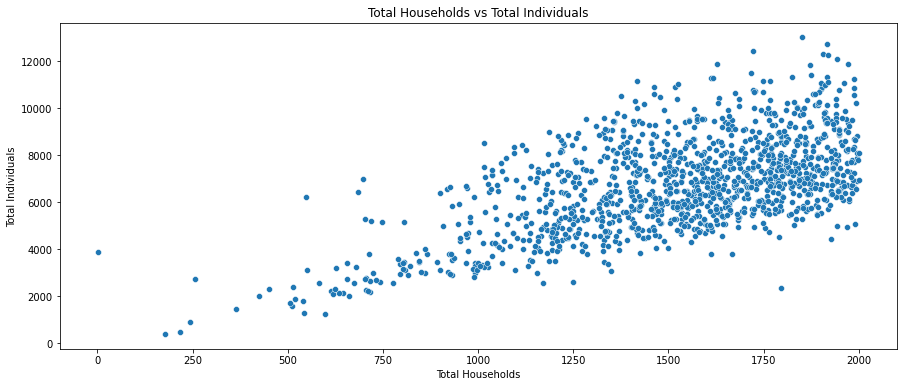

In [11]:
plt.figure(figsize=(15,6))
sns.scatterplot(tr_copy['total_households'], tr_copy['total_individuals'])
plt.xlabel("Total Households")
plt.ylabel("Total Individuals")
plt.title("Total Households vs Total Individuals")

In [12]:
# It looks like we do have an outlier and in some point, it's doesn't make sense.
# Displaying the outlier
train[train.total_households<175]

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
1094,W0TZK41,1.0,3867.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0.001293,0.0,0.0,0.998707,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001552,0.0,0.0,0.0,0.0,0.0,0,0.998448,0.952935,0.019136,0.006465,0.019912,0.001552,1.0


In [12]:
#Dropping The Outlier
train = train[train.index!=1094]

Creating New Variables we will work with during our model training

In [13]:
## Binned feature on total_households
train['total_householdslessthan5000'] = train['total_households'].apply(lambda x:1 if 2500<x<=5000  else 0)
test['total_householdslessthan5000'] = test['total_households'].apply(lambda x:1 if 2500<x<=5000  else 0)

In [14]:
train['Individualsperhouse'] = train['total_individuals'] / train['total_households']
test['Individualsperhouse'] = test['total_individuals'] / test['total_households']

In [15]:
train['Luxury_01'] = train['car_01']+train['stv_00']+train['psa_01']
train['Luxury_00'] = train['car_00'] +train['stv_01']+train['psa_00']

In [16]:
test['Luxury_01'] = test['car_01']+test['stv_00']+test['psa_01']
test['Luxury_00'] = test['car_00'] +test['stv_01']+test['psa_00']

In [17]:
train['NoSchoolAttendace'] = train['psa_01'] + train['psa_02']+ train['psa_03']
test['NoSchoolAttendace'] = test['psa_01'] + test['psa_02']+ test['psa_03']

In [18]:
train['InformalDwellings'] = train['dw_02'] + train['dw_07'] + train['dw_06']
test['InformalDwellings'] = test['dw_02'] + test['dw_07'] + test['dw_06']

In [19]:
train['TraditionalVSInformalDwellings'] = np.absolute(train['dw_01'] - train['dw_08'])
test['TraditionalVSInformalDwellings'] = np.absolute(test['dw_01'] - test['dw_08'])

In [20]:
train['total_households']/=train['total_households'].max()
train['total_individuals']/=train['total_individuals'].max()

test['total_households']/=test['total_households'].max()
test['total_individuals']/=test['total_individuals'].max()

In [21]:
train['SAOldPeopleSesothoVSSetswana'] = np.absolute(train['lan_06'] - train['lan_07'])

test['SAOldPeopleSesothoVSSetswana'] = np.absolute(test['lan_06'] - test['lan_07'])

In [22]:
# Describing results are Data cleaning 
train.describe()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,total_householdslessthan5000,Individualsperhouse,Luxury_01,Luxury_00,NoSchoolAttendace,InformalDwellings,TraditionalVSInformalDwellings,SAOldPeopleSesothoVSSetswana
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.0,3142.0,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.0,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.218701,0.225300,10.321489,0.713380,0.098330,0.031444,0.005542,0.007905,0.006024,0.021782,0.037455,0.062680,0.006867,0.001132,0.007459,0.0,0.0,0.313621,0.524506,0.000526,0.033227,0.128119,0.226817,0.773183,0.246941,0.753059,0.094721,0.905279,0.099696,0.054878,0.027150,0.038706,0.287430,0.124082,0.101481,0.126564,0.004485,0.033943,0.025652,0.049897,0.011964,0.0,0.014073,0.863307,0.042207,0.017566,0.073344,0.003576,0.830950,0.265118,3.981202,1.504382,1.333746,0.558259,0.090681,0.140919,0.188131
std,0.177009,0.157243,12.779429,0.215883,0.189202,0.077275,0.017388,0.028402,0.023845,0.036186,0.056017,0.111467,0.016766,0.003038,0.015829,0.0,0.0,0.076931,0.085754,0.000803,0.023151,0.033971,0.173898,0.173898,0.191177,0.191177,0.128013,0.128013,0.209326,0.117384,0.085294,0.082538,0.374978,0.269444,0.213635,0.255758,0.004559,0.147583,0.133577,0.154073,0.020119,0.0,0.037421,0.248422,0.147233,0.074837,0.168985,0.010406,0.208031,0.441466,0.996544,0.119879,0.110570,0.088119,0.102085,0.197521,0.296820
min,0.011897,0.007537,0.000000,0.005552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.019419,0.134106,0.000000,0.003212,0.017142,0.004186,0.159514,0.018241,0.041328,0.002430,0.237387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692,0.000000,1.254742,0.659136,0.810875,0.160601,0.000858,0.000000,0.000000
25%,0.111242,0.130125,0.434672,0.594886,0.002987,0.002409,0.000000,0.000000,0.000000,0.002646,0.004562,0.002767,0.000182,0.000000,0.001964,0.0,0.0,0.258055,0.462903,0.000128,0.016927,0.110782,0.097606,0.690788,0.130952,0.723038,0.017173,0.885495,0.002737,0.009050,0.003856,0.001480,0.010016,0.001688,0.002319,0.003793,0.001622,0.000278,0.000300,0.000447,0.002462,0.0,0.000000,0.880501,0.000942,0.000844,0.000441,0.000619,0.788542,0.000000,3.321824,1.421019,1.259610,0.491062,0.027062,0.009156,0.003400
50%,0.150049,0.172184,3.787997,0.769949,0.011028,0.005774,0.000796,0.000593,0.000785,0.008282,0.015630,0.013447,0.001753,0.000382,0.004000,0.0,0.0,0.305505,0.535982,0.000327,0.026824,0.126434,0.173422,0.826578,0.175146,0.824854,0.038771,0.961229,0.007474,0.016989,0.008686,0.007377,0.044739,0.003944,0.014891,0.007868,0.002935,0.001210,0.001146,0.002909,0.006205,0.0,0.000086,0.989915,0.003064,0.001752,0.001194,0.001606,0.909951,0.000000,3.826590,1.505336,1.332034,0.568989,0.059968,0.050816,0.015117
75%,0.240070,0.247899,17.826008,0.886824,0.075992,0.027807,0.002507,0.002079,0.002884,0.024495,0.045743,0.070347,0.006448,0.001051,0.007662,0.0,0.0,0.373035,0.584918,0.000660,0.042601,0.140361,0.309212,0.902394,0.276962,0.869048,0.114505,0.982827,0.058908,0.035131,0.014238,0.036178,0.60

In [23]:
# After describing from above, we saw that there's something wrong wiith 3 columns, which are "dw_12", "dw_13" and "lan_13"
# Dropping those columns
train_copy = train.copy()
train = train_copy.drop(['dw_12', 'dw_13', 'lan_13'], axis=1)
train

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,total_householdslessthan5000,Individualsperhouse,Luxury_01,Luxury_00,NoSchoolAttendace,InformalDwellings,TraditionalVSInformalDwellings,SAOldPeopleSesothoVSSetswana
0,9D9BEUB,0.906986,0.731607,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,0.044411,0.360511,0.004950,0.000848,0.006711,0.192690,0.626544,0.000396,0.071214,0.109157,0.275335,0.724665,0.343501,0.656499,0.326122,0.673878,0.012956,0.482007,0.009574,0.109440,0.299974,0.001880,0.015047,0.004691,0.003556,0.003843,0.000787,0.001723,0.027796,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259,0,2.875762,1.558378,1.260856,0.698154,0.229653,0.355729,0.010356
1,RERH3XM,0.908583,0.616420,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,0.231013,0.289105,0.025454,0.000289,0.007050,0.165663,0.701452,0.000713,0.016803,0.115370,0.059933,0.940067,0.080532,0.919468,0.033706,0.966294,0.003241,0.013292,0.010543,0.233694,0.486355,0.029286,0.111983,0.011787,0.004042,0.010961,0.005768,0.041982,0.021312,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136,0,2.418731,1.680852,1.186263,0.718967,0.408564,0.287040,0.100197
2,GJWA3BO,0.180348,0.154887,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,0.132829,0.001320,0.002305,0.000849,0.006466,0.293674,0.534299,0.000397,0.027582,0.144048,0.169733,0.830267,0.108760,0.891240,0.056128,0.943872,0.008827,0.019836,0.004155,0.220034,0.077659,0.002389,0.560416,0.018953,0.010277,0.004701,0.002755,0.014786,0.005827,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315,1,3.061820,1.595272,1.232701,0.562278,0.243924,0.000971,0.541464
3,GW6VRB7,0.131401,0.170037,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333,0,4.613392,1.382581,1.453279,0.545631,0.131557,0.031595,0.068627
4,CN9JZJC,0.123789,0.185767,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964,0,5.350122,1.324831,1.499872,0.432711,0.069610,0.120296,0.003548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,HFWMU2J,0.047034,0.051691,3.500868,0.816469,0.070643,0.003699,0.004518,0.000000,0.000000,0.001433,0.006391,0.049242,0.011097,0.012207,0.024301,0.215378,0.648514,0.000000,0.015256,0.120853,0.186006,0.813994,0.278325,0.721675,0.026363,0.973637,0.983206,0.005568,0.000422,0.000903,0.000481,0.001384,0.000903,0.001795,0.000903,0.000422,0.000873,0.000000,0.000962,0.002176,0.032270,0.924304,0.002366,0.035771,0.005288,0.691621,0,3.918067,1.556195,1.307697,0.663770,0.011523,0.021401,0.000892
3170,8LVBHRG,0.552450,0.559956,0.116460,0.913623,0.000397,0.001184,0.000270,0.000124,0.000862,0.025582,0.015723,0.037453,0.001375,0.000000,0.003407,0.292636,0.533827,0.000707,0.080066,0.092764,0.452699,0.547301,0.380879,0.619121,0.166724,0.833276,0.002240,0.021769,0.024921,0.008089,0.036519,0.054329,0.028624,0.743253,0.002812,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


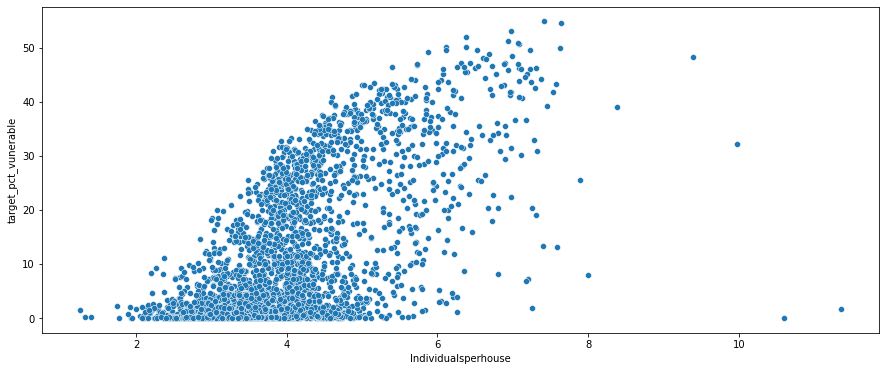

In [24]:
plt.figure(figsize=(15,6))
sns.scatterplot('Individualsperhouse', 'target_pct_vunerable', data=train)

In [25]:
#Looks like there is an outlier where IndividualsperHouse is greater than 10
# Dropping the outlier
to_drop = train.query('Individualsperhouse >= 10').index.tolist()

train = train.query('Individualsperhouse < 10')

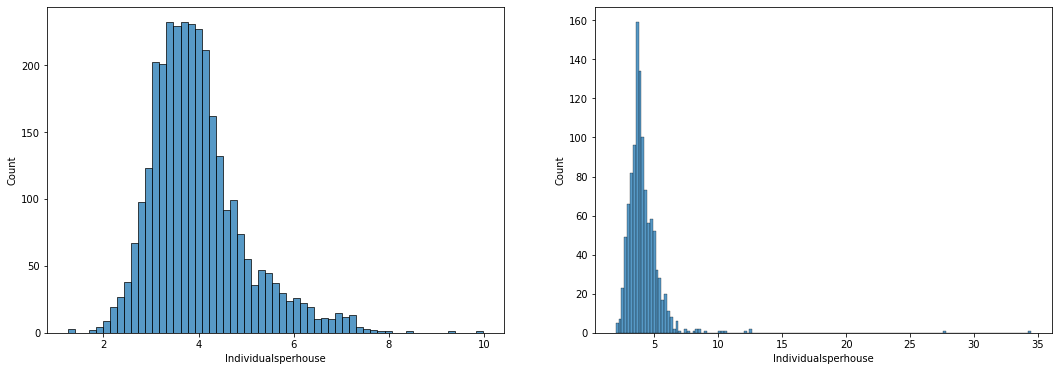

In [26]:
# Checking skewness of individuals per households
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
sns.histplot(train.Individualsperhouse, ax=axes[0])
sns.histplot(test.Individualsperhouse, ax=axes[1])

**K Means clustering, Target Encording and PCA to wrap it all up for some dimensionality reduction**




In [27]:
### Applying Kmeans to almost all features and generating a 'cluster' feature.
import sys
train_copy=train.copy()
columns=train_copy.drop(["ward","target_pct_vunerable"],1).columns
train_copy=train_copy[columns]
km=KMeans(7,random_state=42)
km=km.fit(train_copy[columns])
train["cluster"]=km.predict(train[columns])
test["cluster"]=km.predict(test[columns])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
target_mean = train.groupby(['cluster']).mean()[['target_pct_vunerable']]
for i in list(target_mean.columns):
  target_mean.rename({i:i+"_mean"},axis=1,inplace=True)
train = train.merge(target_mean,how="left",on='cluster')
test = test.merge(target_mean,how="left",on='cluster')

In [29]:
pca = PCA(random_state=42,n_components=1)
pg_features =  train.filter(regex='lan_.*')
train_pca = pca.fit_transform(pg_features)
train['pca_lan_0'] = train_pca[:,0]

In [33]:
pg_features =  test.filter(regex='lan_.*')
test_pca = pca.transform(pg_features)
test['pca_lan_0'] = test_pca[:,0]

In [31]:
target = train['target_pct_vunerable']

In [32]:
train = train.drop(['psa_00','psa_02','psa_03','psa_04','psa_01','lgt_00','stv_01','car_01','lln_01','ward','target_pct_vunerable'], axis=1)
test = test.drop(['psa_00','psa_02','psa_03','psa_04','psa_01','lgt_00','stv_01','car_01','lln_01','ward','dw_12','dw_13','lan_13'], axis=1)

**Training our model with KFold splited into 4 sections using XGBoost**

In [34]:
## defining the metric
def metric(x,y):
  return np.sqrt(mean_squared_error(x,y))

In [35]:
kf = KFold(n_splits=4,shuffle=False)
xgb = XGBRegressor(n_estimators=50000,random_state=42,max_depth=5,learning_rate=0.03888)
scores = []
pred_test = np.zeros(len(test))
for (train_index,test_index) in kf.split(train,target):
  X_train,X_test = train.iloc[train_index],train.iloc[test_index]
  y_train,y_test = target.iloc[train_index],target.iloc[test_index]
  xgb.fit(X_train,y_train,early_stopping_rounds=500,eval_set=[(X_test,y_test)],eval_metric='rmse')
  scores.append(metric(xgb.predict(X_test),y_test))
  pred_test+=xgb.predict(test)

Streaming output truncated to the last 5000 lines.
[170]	validation_0-rmse:5.95561
[171]	validation_0-rmse:5.95488
[172]	validation_0-rmse:5.9533
[173]	validation_0-rmse:5.95251
[174]	validation_0-rmse:5.95289
[175]	validation_0-rmse:5.95276
[176]	validation_0-rmse:5.95338
[177]	validation_0-rmse:5.95292
[178]	validation_0-rmse:5.95266
[179]	validation_0-rmse:5.95142
[180]	validation_0-rmse:5.95033
[181]	validation_0-rmse:5.94979
[182]	validation_0-rmse:5.95014
[183]	validation_0-rmse:5.9501
[184]	validation_0-rmse:5.9484
[185]	validation_0-rmse:5.94803
[186]	validation_0-rmse:5.94611
[187]	validation_0-rmse:5.94545
[188]	validation_0-rmse:5.94245
[189]	validation_0-rmse:5.94152
[190]	validation_0-rmse:5.94157
[191]	validation_0-rmse:5.94
[192]	validation_0-rmse:5.93941
[193]	validation_0-rmse:5.93858
[194]	validation_0-rmse:5.93693
[195]	validation_0-rmse:5.93498
[196]	validation_0-rmse:5.93314
[197]	validation_0-rmse:5.93234
[198]	validation_0-rmse:5.93196
[199]	validation_0-rmse:5.9

In [36]:
np.mean(scores)

5.750236833381248

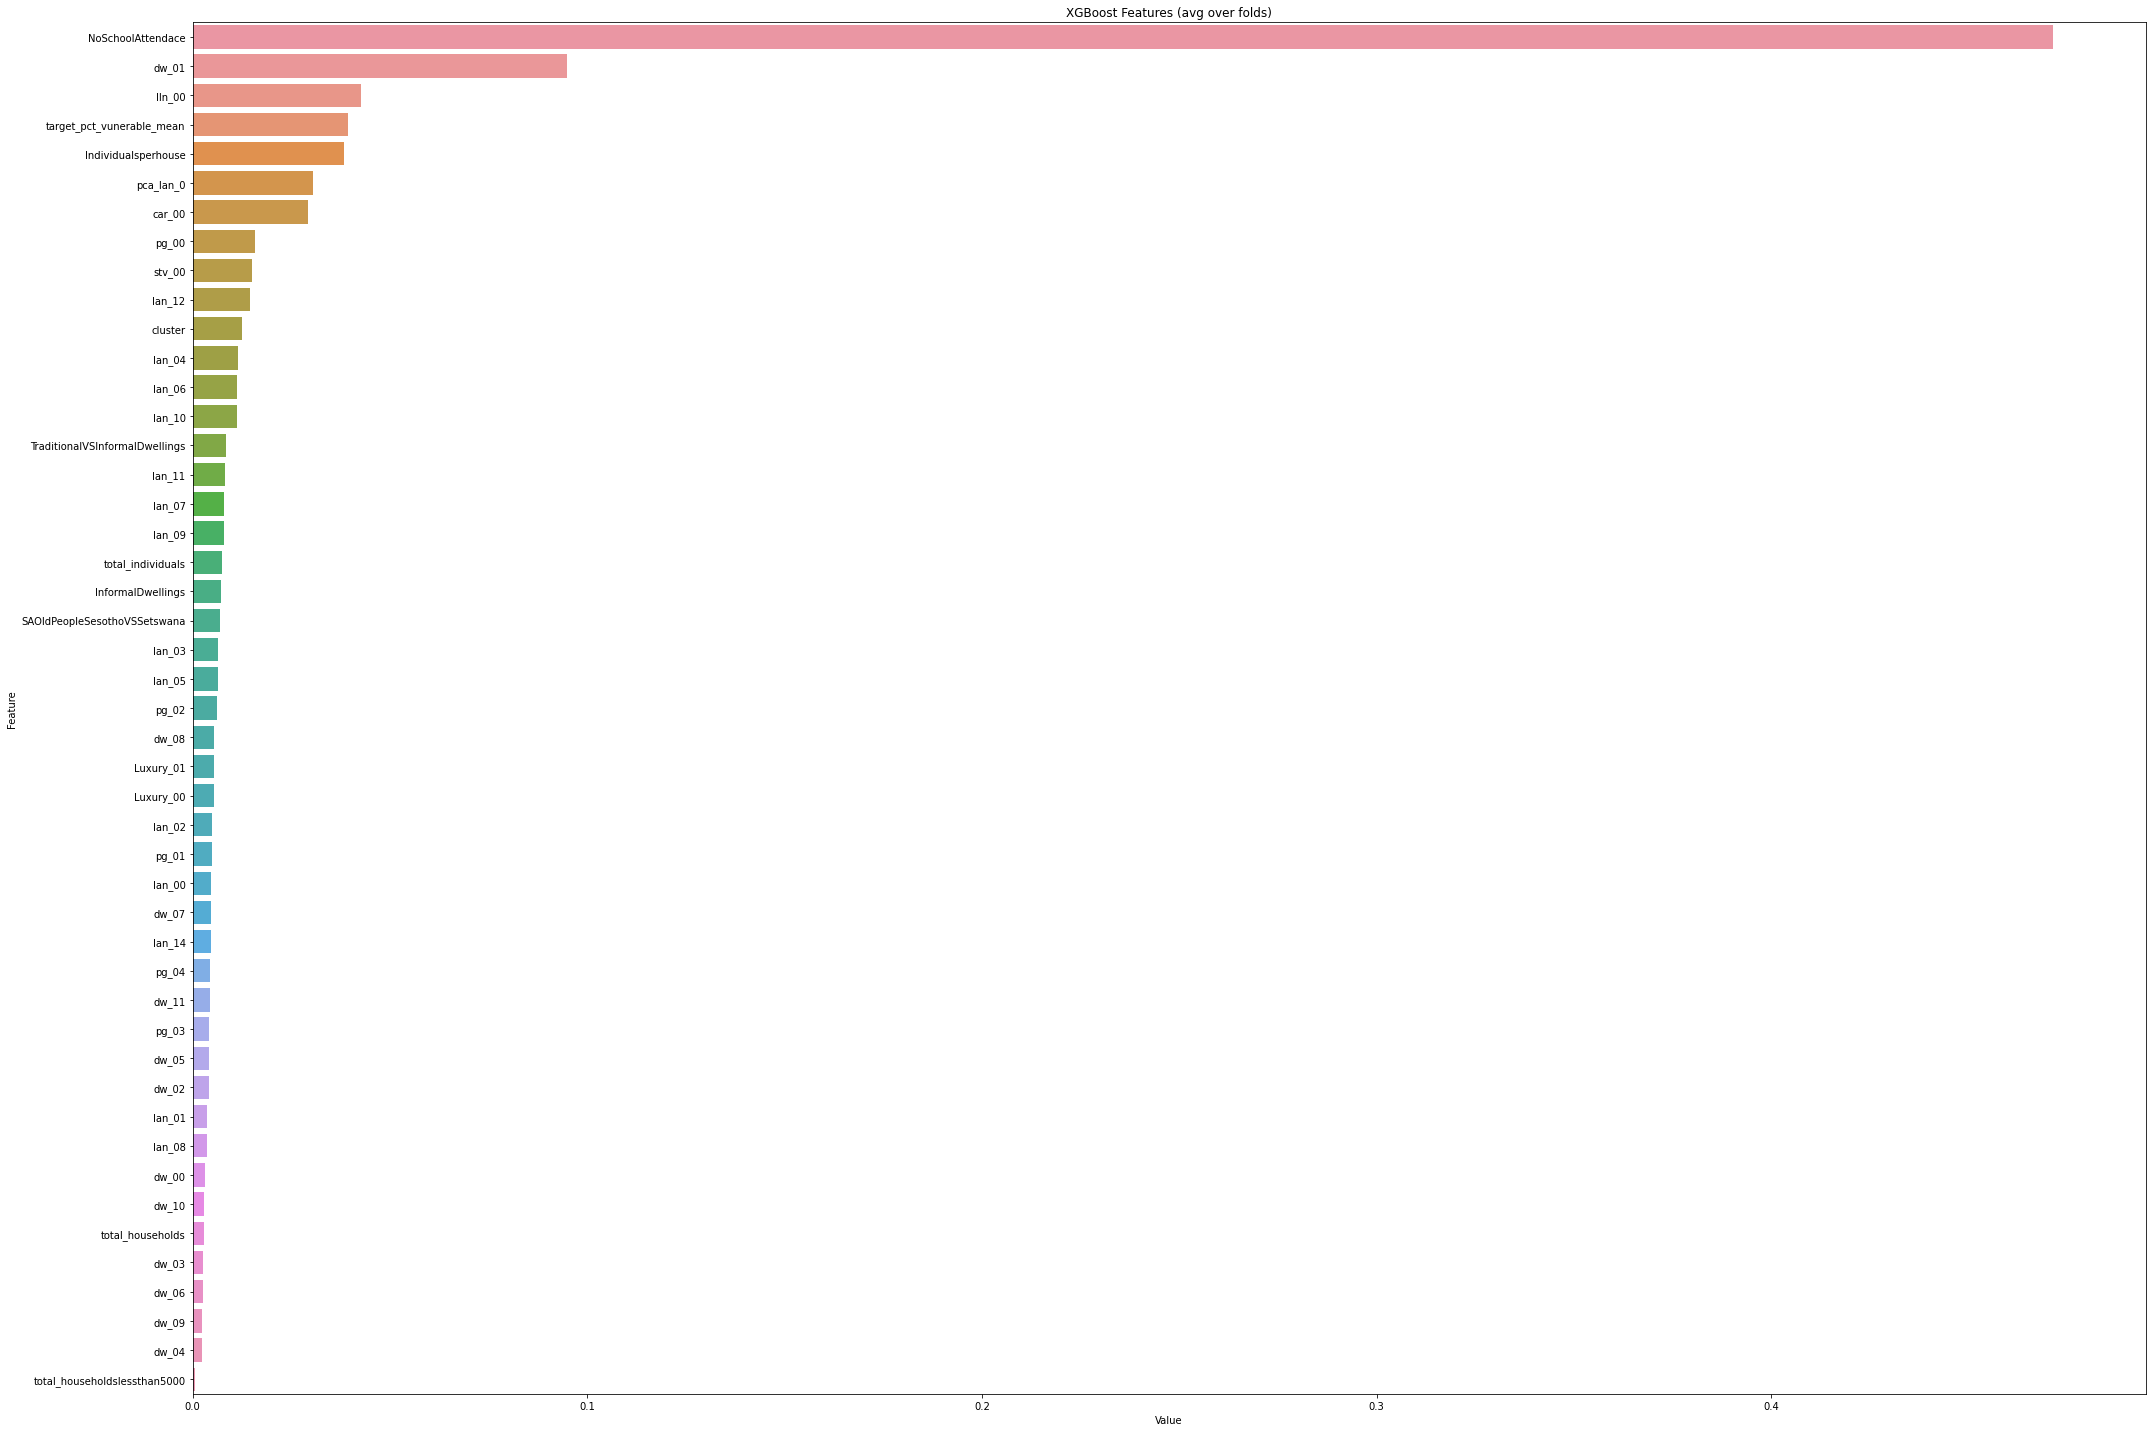

In [44]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(30, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

**The Predictions By the model on the testing data**

In [49]:
model['target_pct_vunerable'] = np.absolute(pred_test/4)
model = model['target_pct_vunerable']
model

0       11.446122
1       31.016007
2        6.079552
3        2.989124
4        0.843702
          ...    
1097    10.433792
1098     1.662017
1099     4.690991
1100     1.178640
1101     0.070868
Name: target_pct_vunerable, Length: 1102, dtype: float64

**Saving The Machine Learning Model**

In [51]:
from sklearn.externals import joblib
mod = joblib.dump(model, 'model.joblib')

**Census 2011 Population Dataset**

In [52]:
pop_data = pd.read_csv('drive/MyDrive/Colab Notebooks/census.csv')
df_p = pd.DataFrame(pop_data)
df_p

,name,population,square_kms,population_density
0,Abaqulusi,214714,4184.630000,51.310152
1,Alfred Duma,339777,3764.000000,90.270191
2,Alfred Nzo,801344,10800.592130,74.194451
3,Amahlathi,101035,4820.220000,20.960662
4,Amajuba,500615,6963.333221,71.893012
...,...,...,...,...
262,Western Cape,5822734,131521.559100,44.272088
263,Witzenberg,115946,10752.700000,10.782966
264,Xhariep,121945,37930.049680,3.214997
265,Z F Mgcawu,236783,102484.000000,2.310439


In [91]:
sa_population_sum = df_p['population'].sum()
sa_total_squarekms = df_p['square_kms'].sum()
sa_total_populationDensist = df_p['population_density'].sum()

**Predicting How many People currently are vulnerable to Covid-19 for the Government**

In [65]:
tr = pd.read_csv('drive/MyDrive/Colab Notebooks/Train.csv')


In [73]:
vulnerable = tr['target_pct_vunerable']

In [76]:
prediction_vul = model.sum()
label_vul = vulnerable.sum()
total_vulnerable_sa_pct = label_vul + prediction_vul

In [85]:
vulnerability_pct = ((3174+1102)/prediction_vul)*100
vulnerability_pct.round(2)

30.02

In [83]:
total_vulnerabilities = int(sa_population_sum * (vulnerability_pct/100))
total_vulnerabilities

56021832

Currently there are 2 391 223 Confirmed cases. Calculating the total vulnerable excluding the number of already confirmed cases.

In [87]:
total = total_vulnerabilities - 2391223
total

53630609